# HNCDI Explain: Mathematical Fundamentals of Quantum Computing

### Install the qiskit library in the colab environment

Please run the below cell to ensure the notebook has qiskit installed.

In [ ]:
# Install the qiskit library
%pip install 'qiskit[visualization]'
%pip install qiskit-ibm-runtime
%pip install qiskit-aer

### Import the necessary modules from the Qiskit library


In [1]:
import numpy as np
from qiskit.visualization import *
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit_aer.primitives import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as real_sampler
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit import assemble
import matplotlib.pyplot as plt

### Authenticate with IBM quantum

You will require the API token specified in the IBM quantum platform to ensure you can execute your code on a real quantum computer.

In [3]:
my_token = "<Enter your IBM quantum token>"

service = QiskitRuntimeService(channel="ibm_quantum", token=my_token)

## Tutorial 1: Create a Bell state on a Simulator and on IBMQ

## Create your Bell state circuit

In [2]:
# Create your Bell state circuit

number_of_qubits = 2 #TODO: add qubits
number_of_classical_bits = 2#TODO: add classical bits

qreg_q = QuantumRegister(number_of_qubits, 'q')
creg_c = ClassicalRegister(number_of_classical_bits, 'c')

circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

## Submit Bell state circuit to a simulator

In [3]:
simulator_backend = AerSimulator()

In [4]:
# Submit job to simulator backend
simulator_job = simulator_backend.run(circuit, shots=1024).result()

In [5]:
# List measurement outcomes
simulator_job_counts = simulator_job.get_counts()
simulator_job_counts

{'11': 485, '00': 539}

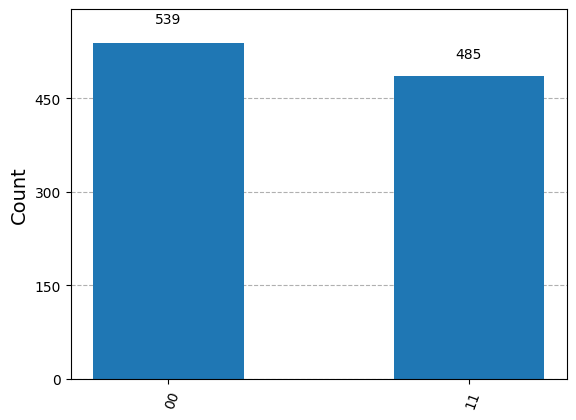

In [6]:
# Plot measurement outcomes 
plot_histogram(simulator_job_counts)

## Submit your Bell state circuit to real quantum hardware

In [9]:
# View backends
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_cusco')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_nazca')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_torino')>]

In [10]:
# Find least busy machine to submit a job to. Set IBMQ backend to this machine.
backend = service.least_busy(operational=True, simulator=False)
sampler = real_sampler(backend)

In [11]:
# Transpile your circuit for the IBMQ backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw()

global phase: 7π/4
                    ┌────────┐ ┌────┐          ┌──────┐┌──────────┐┌────┐»
          q_0 -> 0 ─┤ Rz(-π) ├─┤ √X ├──────────┤1     ├┤ Rz(-π/2) ├┤ √X ├»
                   ┌┴────────┴┐├────┤┌────────┐│  Ecr │├─────────┬┘├────┤»
          q_1 -> 1 ┤ Rz(-π/2) ├┤ √X ├┤ Rz(-π) ├┤0     ├┤ Rz(π/2) ├─┤ √X ├»
                   └──────────┘└────┘└────────┘└──────┘└─────────┘ └────┘»
    ancilla_0 -> 2 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_1 -> 3 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_2 -> 4 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_3 -> 5 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_4 -> 6 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_5 -> 7 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_6 -> 8 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_7 -> 9 ──────────────────────────────────────────────────────»
                                                                         »
   ancilla_8 -> 10 ──────────────────────────────────────────────────────»
                                                                         »
   ancilla_9 -> 11 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_10 -> 12 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_11 -> 13 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_12 -> 14 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_13 -> 15 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_14 -> 16 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_15 -> 17 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_16 -> 18 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_17 -> 19 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_18 -> 20 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_19 -> 21 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_20 -> 22 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_21 -> 23 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_22 -> 24 ──────────────────────────────────────────────────────»
                                                                         »
  ancilla_23 -> 25 ──────────────────────────────────────────────────────»
                                                                         »
  anci

In [12]:
# Submit job to IBMQ backend
job = sampler.run([transpiled_circuit], shots=1024)
results = job.result()

In [13]:
# List measurement outcomes
result = results[0].data.c
measurements = result.get_counts()
measurements

{'11': 477, '00': 504, '01': 19, '10': 24}

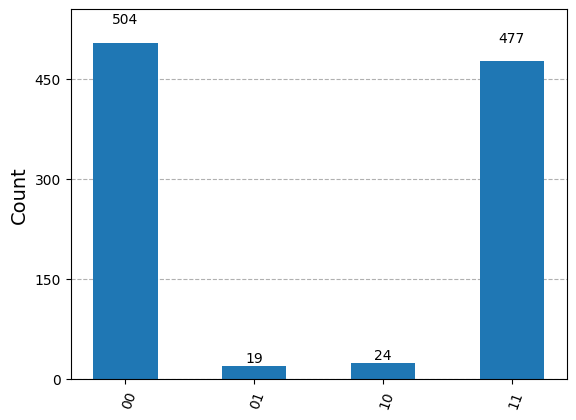

In [14]:
# Plot measurement outcomes
plot_histogram(measurements)